In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from jupyterthemes import jtplot

In [30]:
tweets_df = pd.read_csv('Twitter_Sentiment_Dataset.csv')
# pd.options.display.float_format = '{:,.0f}'.format
tweets_df.head()

,ItemID,Sentiment,SentimentText
0,1,0,is so sad for my APL frie...
1,2,0,I missed the New Moon trail...
2,3,1,omg its already 7:30 :O
3,4,0,.. Omgaga. Im sooo im gunna CRy. I'...
4,5,0,i think mi bf is cheating on me!!! ...


In [31]:
tweets_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30070 entries, 0 to 30069
Data columns (total 3 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   ItemID         30070 non-null  int64 
 1   Sentiment      30070 non-null  int64 
 2   SentimentText  30070 non-null  object
dtypes: int64(2), object(1)
memory usage: 704.9+ KB


In [32]:
tweets_df.describe()

,ItemID,Sentiment
count,"30,070","30,070"
mean,"15,044",1
std,"8,684",0
min,1,0
25%,"7,520",0
50%,"15,046",1
75%,"22,564",1
max,"30,081",1


In [33]:
tweets_df['SentimentText']

0                             is so sad for my APL frie...
1                           I missed the New Moon trail...
2                                  omg its already 7:30 :O
3                  .. Omgaga. Im sooo  im gunna CRy. I'...
4                 i think mi bf is cheating on me!!!   ...
                               ...                        
30065    @alanjlee bit misleading if that is indeed wha...
30066    @alanjlee Don't let that fool you, she can be ...
30067    @alanjmcgee me neither. shit that's sad. he wa...
30068    @alanjmcgee Were we separated at birth Alan? F...
30069    @alanjurez06 oi wab but then they came home an...
Name: SentimentText, Length: 30070, dtype: object

In [34]:
tweets_df = tweets_df.drop(['ItemID'], axis = 1)
tweets_df.head()

,Sentiment,SentimentText
0,0,is so sad for my APL frie...
1,0,I missed the New Moon trail...
2,1,omg its already 7:30 :O
3,0,.. Omgaga. Im sooo im gunna CRy. I'...
4,0,i think mi bf is cheating on me!!! ...


c:\users\sakib\appdata\local\programs\python\python38\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Sentiment', ylabel='count'>

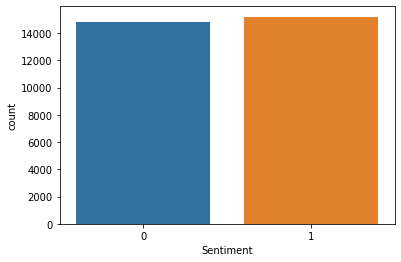

In [35]:
sns.countplot(tweets_df['Sentiment'], label = 'Number')

In [36]:
tweets_df['Length'] = tweets_df['SentimentText'].apply(len)
tweets_df.head()

,Sentiment,SentimentText,Length
0,0,is so sad for my APL frie...,61
1,0,I missed the New Moon trail...,51
2,1,omg its already 7:30 :O,37
3,0,.. Omgaga. Im sooo im gunna CRy. I'...,132
4,0,i think mi bf is cheating on me!!! ...,53


In [37]:
positive = tweets_df[tweets_df['Sentiment']==1]
positive.head()

,Sentiment,SentimentText,Length
2,1,omg its already 7:30 :O,37
6,1,Juuuuuuuuuuuuuuuuussssst Chillin!!,41
8,1,handed in my uniform today . i miss you ...,53
9,1,hmmmm.... i wonder how she my number @-),46
11,1,thanks to all the haters up in my face a...,61


In [38]:
negative = tweets_df[tweets_df['Sentiment']==0]
negative.head()

,Sentiment,SentimentText,Length
0,0,is so sad for my APL frie...,61
1,0,I missed the New Moon trail...,51
3,0,.. Omgaga. Im sooo im gunna CRy. I'...,132
4,0,i think mi bf is cheating on me!!! ...,53
5,0,or i just worry too much?,42


In [39]:
sentences = tweets_df['SentimentText'].tolist()
sentences

['                     is so sad for my APL friend.............',
 '                   I missed the New Moon trailer...',
 '              omg its already 7:30 :O',
 "          .. Omgaga. Im sooo  im gunna CRy. I've been at this dentist since 11.. I was suposed 2 just get a crown put on (30mins)...",
 '         i think mi bf is cheating on me!!!       T_T',
 '         or i just worry too much?        ',
 '       Juuuuuuuuuuuuuuuuussssst Chillin!!',
 '       Sunny Again        Work Tomorrow  :-|       TV Tonight',
 '      handed in my uniform today . i miss you already',
 '      hmmmm.... i wonder how she my number @-)',
 '      I must think about positive..',
 '      thanks to all the haters up in my face all day! 112-102',
 '      this weekend has sucked so far',
 '     jb isnt showing in australia any more!',
 '     ok thats it you win.',
 '    &lt;-------- This is the way i feel right now...',
 "    awhhe man.... I'm completely useless rt now. Funny, all I can do is twitter. http://m

In [40]:
len(sentences)

30070

In [42]:
sen_as_one_str = " ".join(sentences)

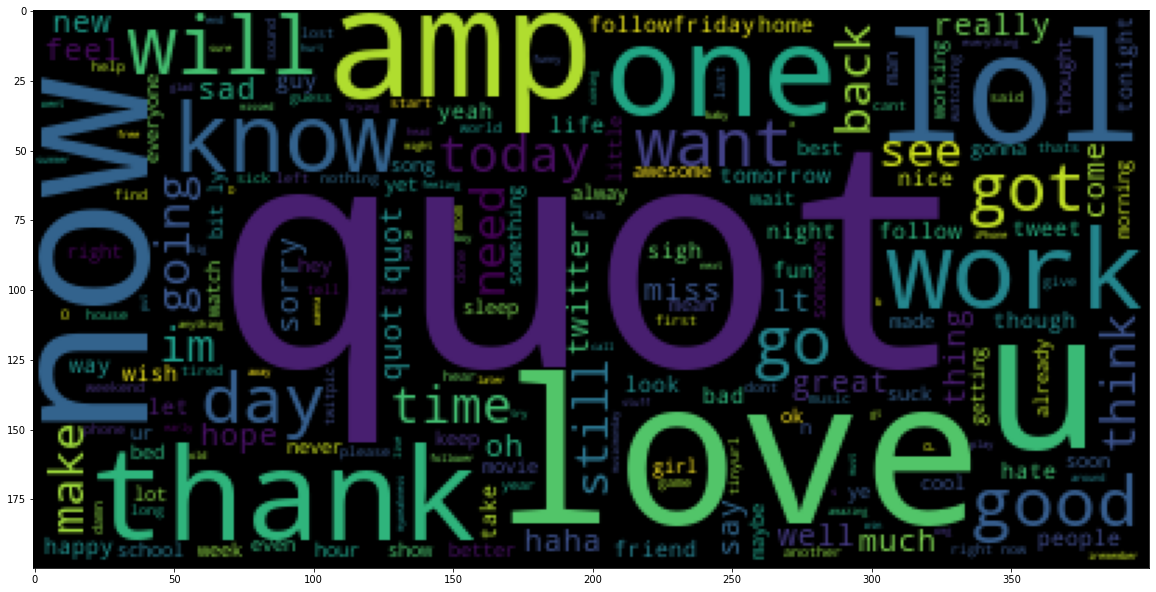

In [43]:
from wordcloud import WordCloud

plt.figure(figsize=(20,20))
plt.imshow(WordCloud().generate(sen_as_one_str))

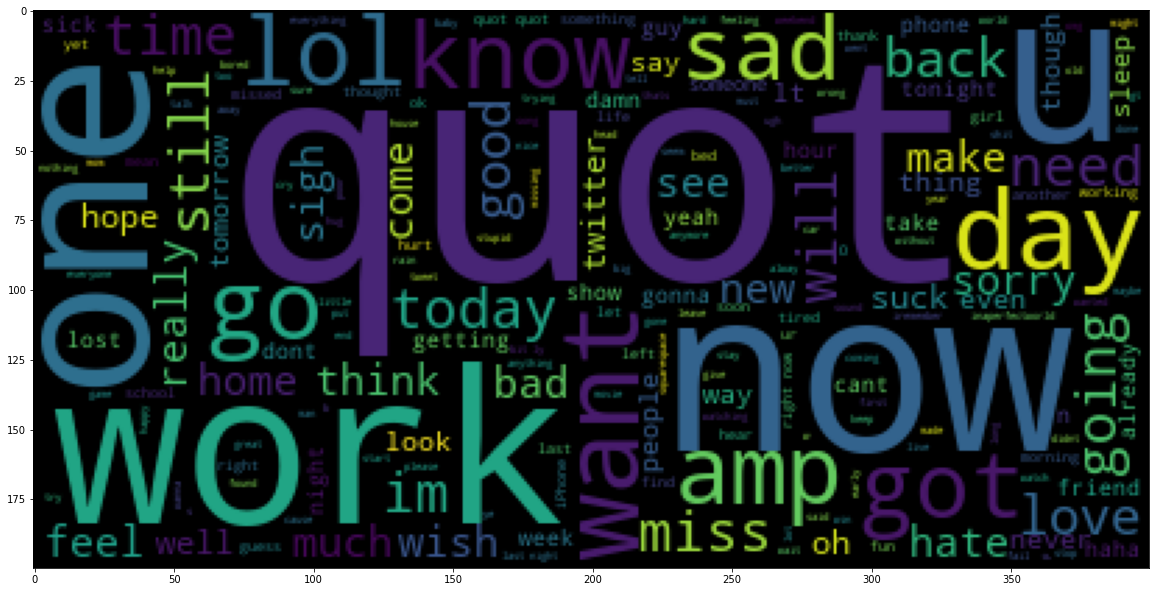

In [44]:
neg_list = negative['SentimentText'].tolist()
neg_sentences_as_one_str = " ".join(neg_list) 

plt.figure(figsize=(20,20))
plt.imshow(WordCloud().generate(neg_sentences_as_one_str))

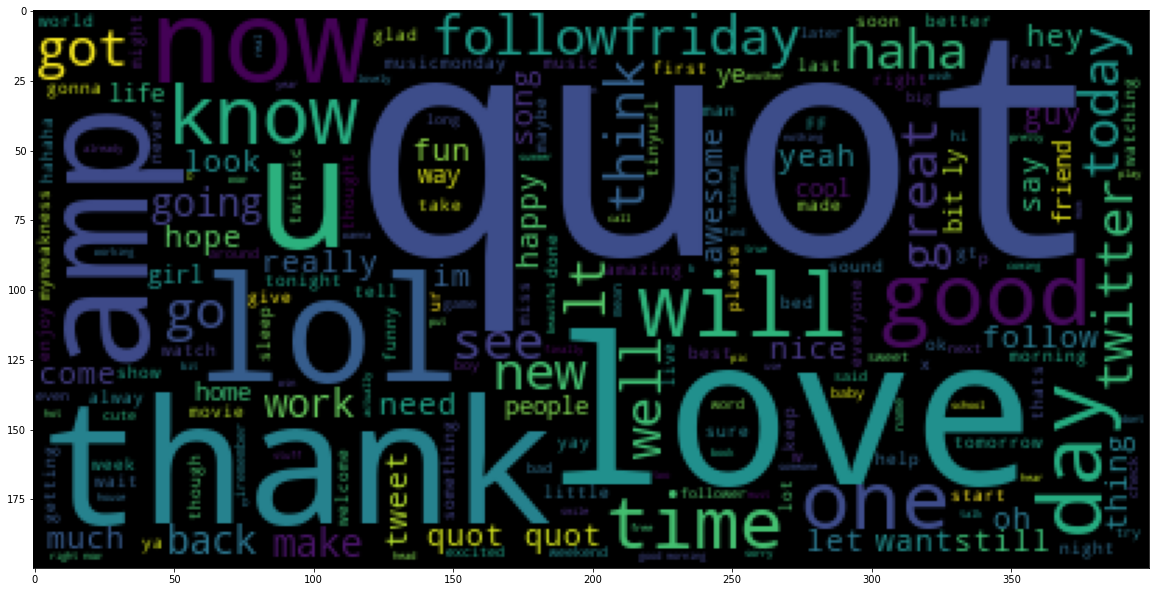

In [45]:
pos_list = positive['SentimentText'].tolist()
pos_sentences_as_one_str = " ".join(pos_list) 

plt.figure(figsize=(20,20))
plt.imshow(WordCloud().generate(pos_sentences_as_one_str))

In [46]:
import string
string.punctuation

'!"#$%&\'()*+,-./:;<=>?@[\\]^_`{|}~'

In [47]:
import nltk
from nltk.corpus import stopwords
stopwords.words('english')

['i',
 'me',
 'my',
 'myself',
 'we',
 'our',
 'ours',
 'ourselves',
 'you',
 "you're",
 "you've",
 "you'll",
 "you'd",
 'your',
 'yours',
 'yourself',
 'yourselves',
 'he',
 'him',
 'his',
 'himself',
 'she',
 "she's",
 'her',
 'hers',
 'herself',
 'it',
 "it's",
 'its',
 'itself',
 'they',
 'them',
 'their',
 'theirs',
 'themselves',
 'what',
 'which',
 'who',
 'whom',
 'this',
 'that',
 "that'll",
 'these',
 'those',
 'am',
 'is',
 'are',
 'was',
 'were',
 'be',
 'been',
 'being',
 'have',
 'has',
 'had',
 'having',
 'do',
 'does',
 'did',
 'doing',
 'a',
 'an',
 'the',
 'and',
 'but',
 'if',
 'or',
 'because',
 'as',
 'until',
 'while',
 'of',
 'at',
 'by',
 'for',
 'with',
 'about',
 'against',
 'between',
 'into',
 'through',
 'during',
 'before',
 'after',
 'above',
 'below',
 'to',
 'from',
 'up',
 'down',
 'in',
 'out',
 'on',
 'off',
 'over',
 'under',
 'again',
 'further',
 'then',
 'once',
 'here',
 'there',
 'when',
 'where',
 'why',
 'how',
 'all',
 'any',
 'both',
 'each

In [48]:
def text_cleaning(text):
    text_punc_removed = [char for char in text if char not in string.punctuation]
    text_punc_removed = "".join(text_punc_removed)
    text_punc_removed_final =[word for word in text_punc_removed.split() if word.lower() not in stopwords.words('english')]
    return text_punc_removed_final

In [49]:
tweets_df_clean = tweets_df['SentimentText'].apply(text_cleaning)

In [50]:
print(tweets_df_clean[10])

['must', 'think', 'positive']


In [51]:
from sklearn.feature_extraction.text import CountVectorizer

vectorizer = CountVectorizer(analyzer = text_cleaning)
tweets_countVectorizer = CountVectorizer(analyzer = text_cleaning, dtype = 'uint8').fit_transform(tweets_df['SentimentText']).toarray()

In [52]:
tweets_countVectorizer.shape

(30070, 52815)

In [56]:
X = tweets_countVectorizer
y = tweets_df['Sentiment']

In [58]:
X.shape

(30070, 52815)

In [59]:
y.shape

(30070,)

In [60]:
from sklearn.model_selection import train_test_split

In [61]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2)

In [62]:
from sklearn.naive_bayes import MultinomialNB
NB_classifier = MultinomialNB()
NB_classifier.fit(X_train, y_train)

MultinomialNB()

In [63]:
from sklearn.metrics import classification_report, confusion_matrix

<AxesSubplot:>

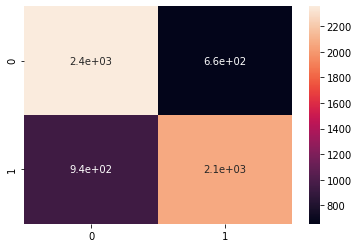

In [64]:
y_predict = NB_classifier.predict(X_test)
cm = confusion_matrix(y_test, y_predict)
sns.heatmap(cm, annot = True)

In [65]:
print(classification_report(y_test, y_predict))

              precision    recall  f1-score   support

           0       0.72      0.78      0.75      3010
           1       0.76      0.69      0.72      3004

    accuracy                           0.74      6014
   macro avg       0.74      0.74      0.74      6014
weighted avg       0.74      0.74      0.74      6014

